<a href="https://colab.research.google.com/github/fiftybucks101/Random_Forest/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading csv file with pandas

df = pd.read_csv('/content/heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


# Feature Nature



*   Cateogrical Features - [anemia, diabetes, high_blood_pressure, sex, smoking]
*   Numerical Features - [age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time]



In [3]:
# Baisc info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [5]:
# check null values

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

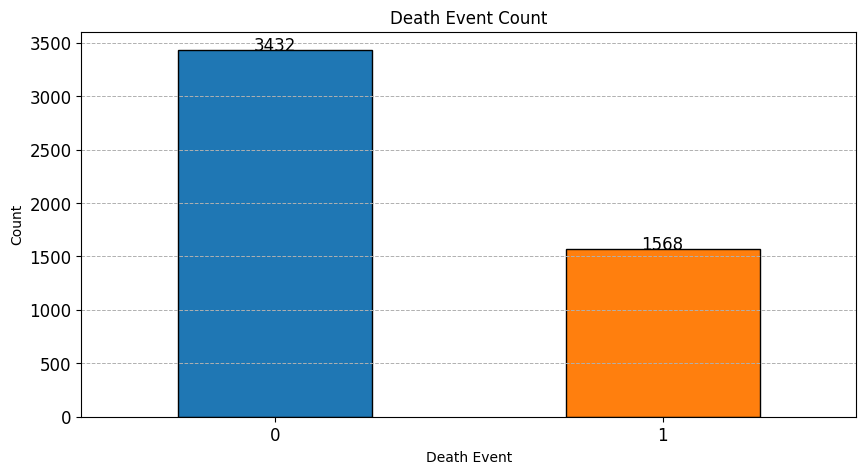

In [6]:
# Distribution of Output Feature DEATH_EVENT

plt.figure(figsize=(10,5))

# add own customize color
colors = ['#1f77b4', '#ff7f0e']
death_event_counts = df['DEATH_EVENT'].value_counts()
death_event_counts.plot(kind='bar',color=colors, edgecolor='black')

plt.title('Death Event Count')
plt.xlabel('Death Event')
plt.ylabel('Count')

#customize tick parameters for better readability
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readibility
plt.grid(axis='y',linestyle='--', linewidth=0.7)

# Add value annotations on top of the bars
for index, value in enumerate(death_event_counts):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12)

# Show the plot
plt.show()

# Insight

Survival Rate more than double then death rate

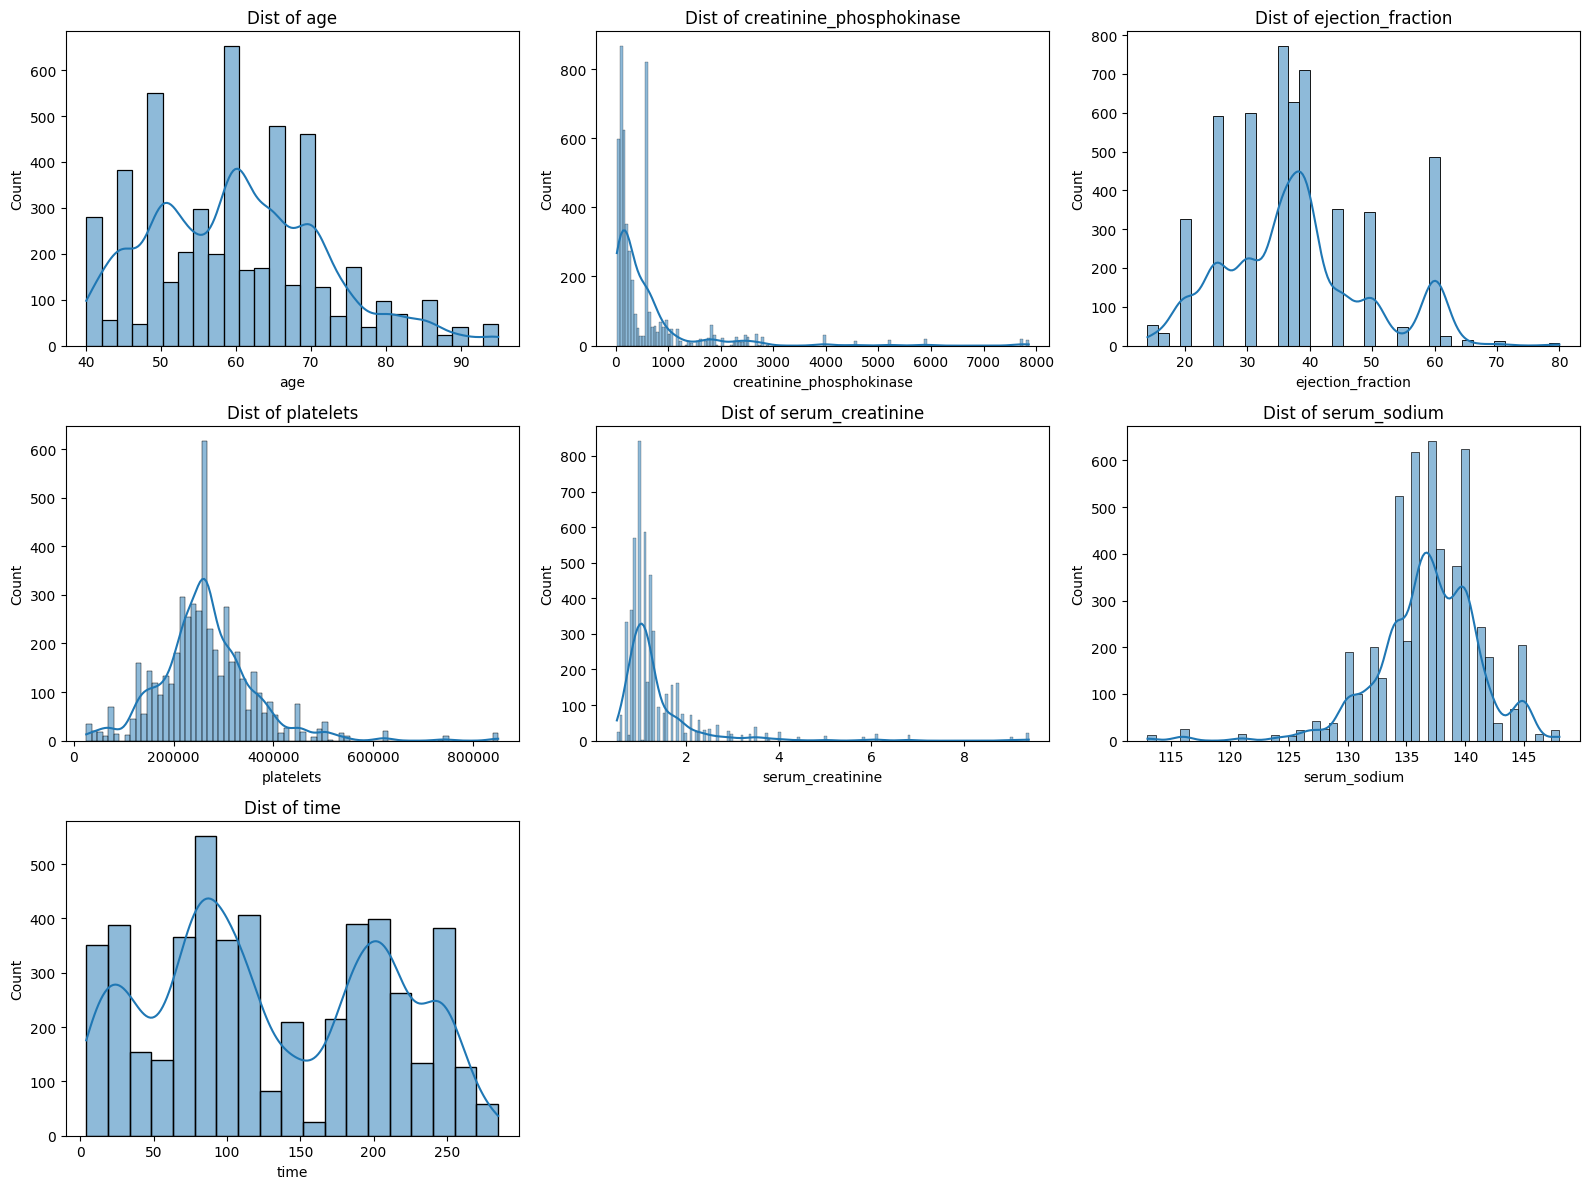

In [7]:
# let's observe distributions of numerical features

numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axs = plt.subplots(3,3,figsize=(16,12))

# converts multidimension array into single dimension
axs = np.ravel(axs)

for index, value in enumerate(numerical_features):
  sns.histplot(data=df,x=value,ax=axs[index],kde=True)
  axs[index].set_title(f'Dist of {value}')

axs[7].set_visible(False)  # Hide subplot 8
axs[8].set_visible(False)  # Hide subplot 9
plt.tight_layout()
plt.show()

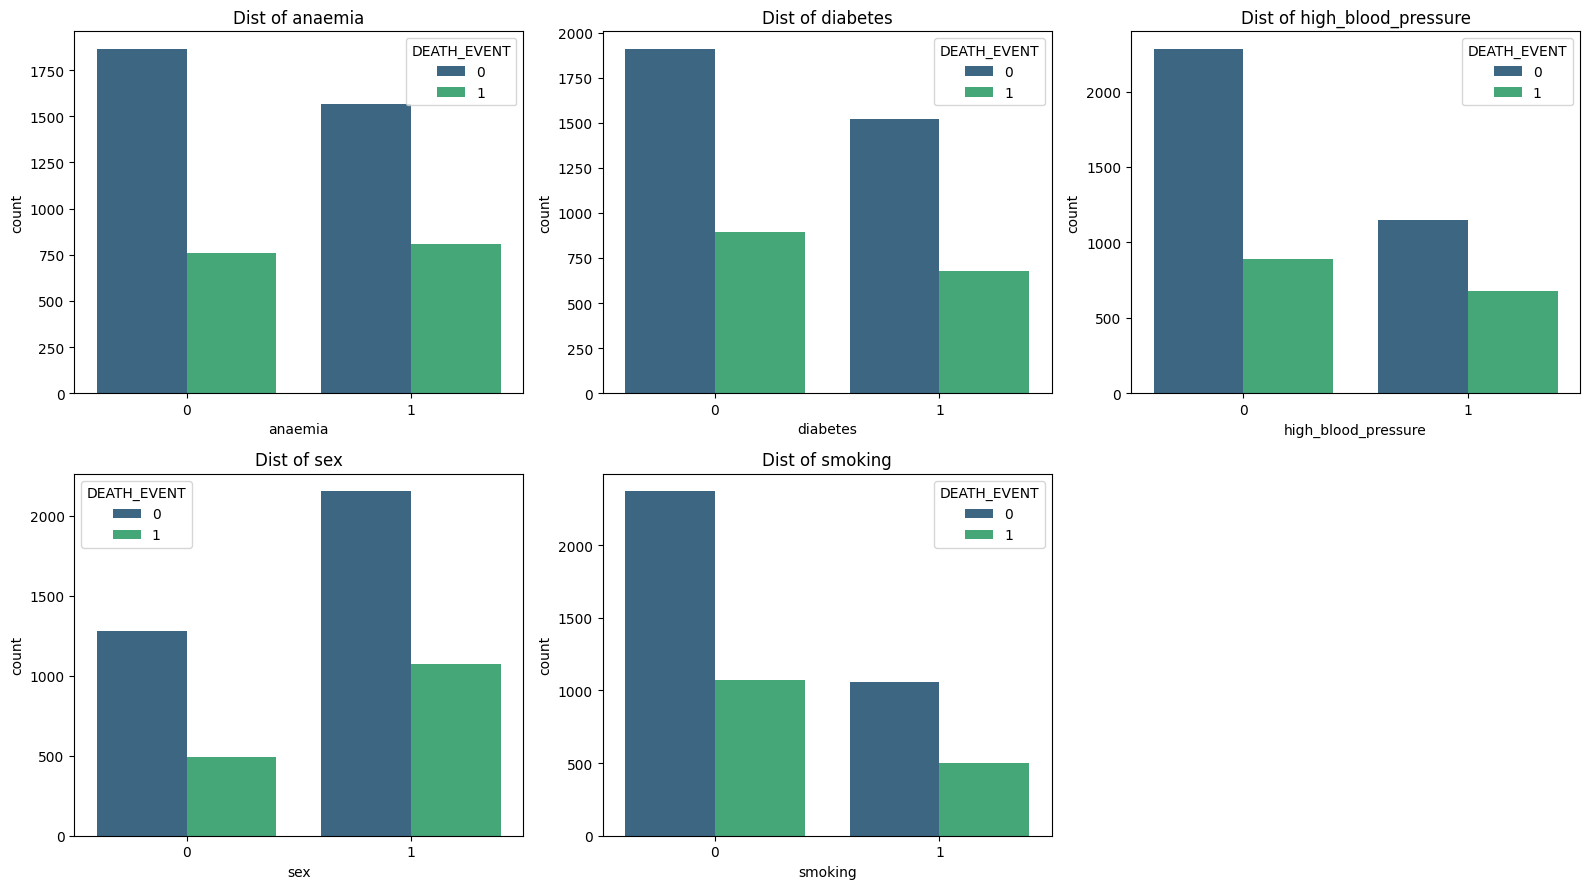

In [8]:
# countplot of categorical featues

categorical_featues = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

fig, axs = plt.subplots(2,3,figsize=(16,9))

# converts multidimension array into single dimension
axs = np.ravel(axs)

for index, value in enumerate(categorical_featues):
  sns.countplot(data=df,x=value,ax=axs[index],palette='viridis',hue='DEATH_EVENT')
  axs[index].set_title(f'Dist of {value}')

axs[5].set_visible(False)  # Hide subplot 5
plt.tight_layout()
plt.show()

# Insight


* Equal proportions of smokers and non-smokers die from heart failure.
* Equal proportions of diabetics and non-diabetics die from heart failure.
* Individuals with high blood pressure have a higher chance of heart failure.



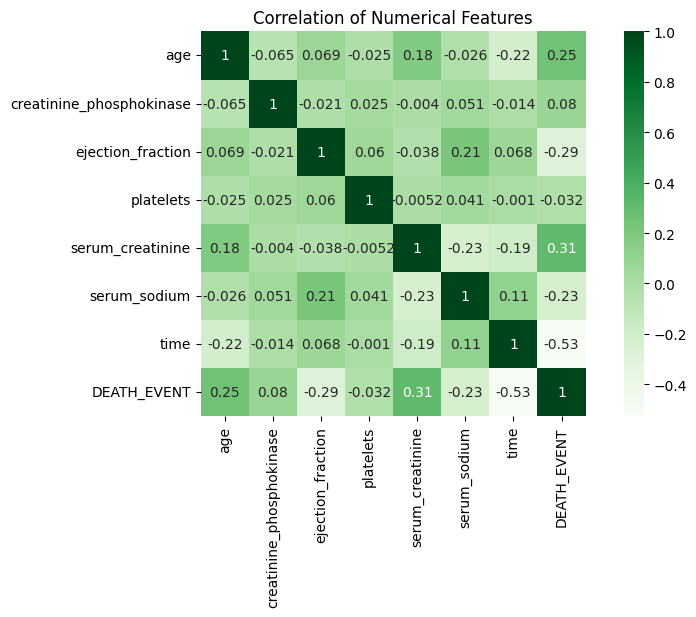

In [9]:
# Correlation of numerical features with Target Output

correlation = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time','DEATH_EVENT']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation,square=True,annot=True,cmap='Greens')
plt.title('Correlation of Numerical Features')
plt.show()

**Insight**


*   Time has high negative correlation with death_event. More number of follow up days, less chance of death occurance and vice verca
*   Creatinine Phosphokinase and Platelets has very low correlation with Death Events



<Axes: xlabel='time', ylabel='Count'>

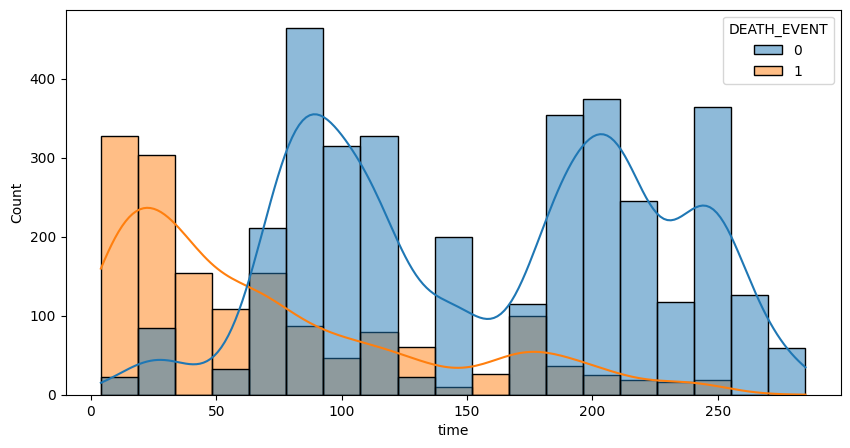

In [10]:
# time and death event histogram

plt.figure(figsize=(10,5))
# Plot the dataset

sns.histplot(x=df['time'],hue=df['DEATH_EVENT'],kde=True)

**Insight**


*   Death kde is right skewed. If follow up time increases, more likely to die.




<Axes: xlabel='age', ylabel='Count'>

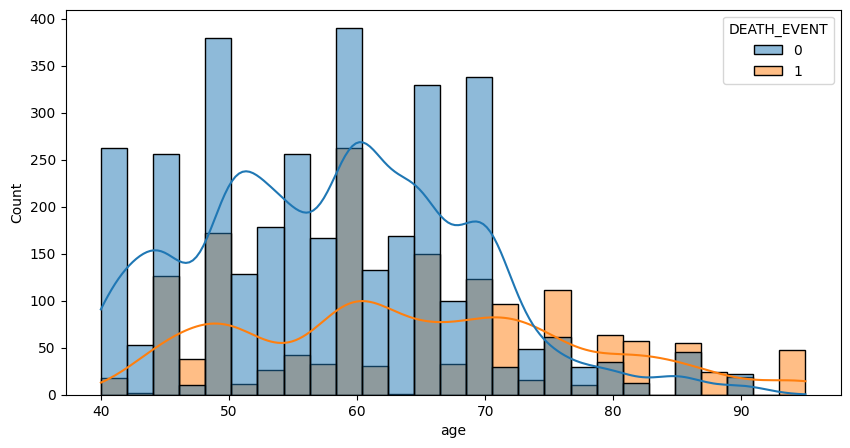

In [11]:
# age and death event histogram

plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],hue=df['DEATH_EVENT'],kde=True)

**Insight**
* Death rate is slightly high aound 70 - 100 years. The correlation is 0.25. So Death rate becomes higher with aging.

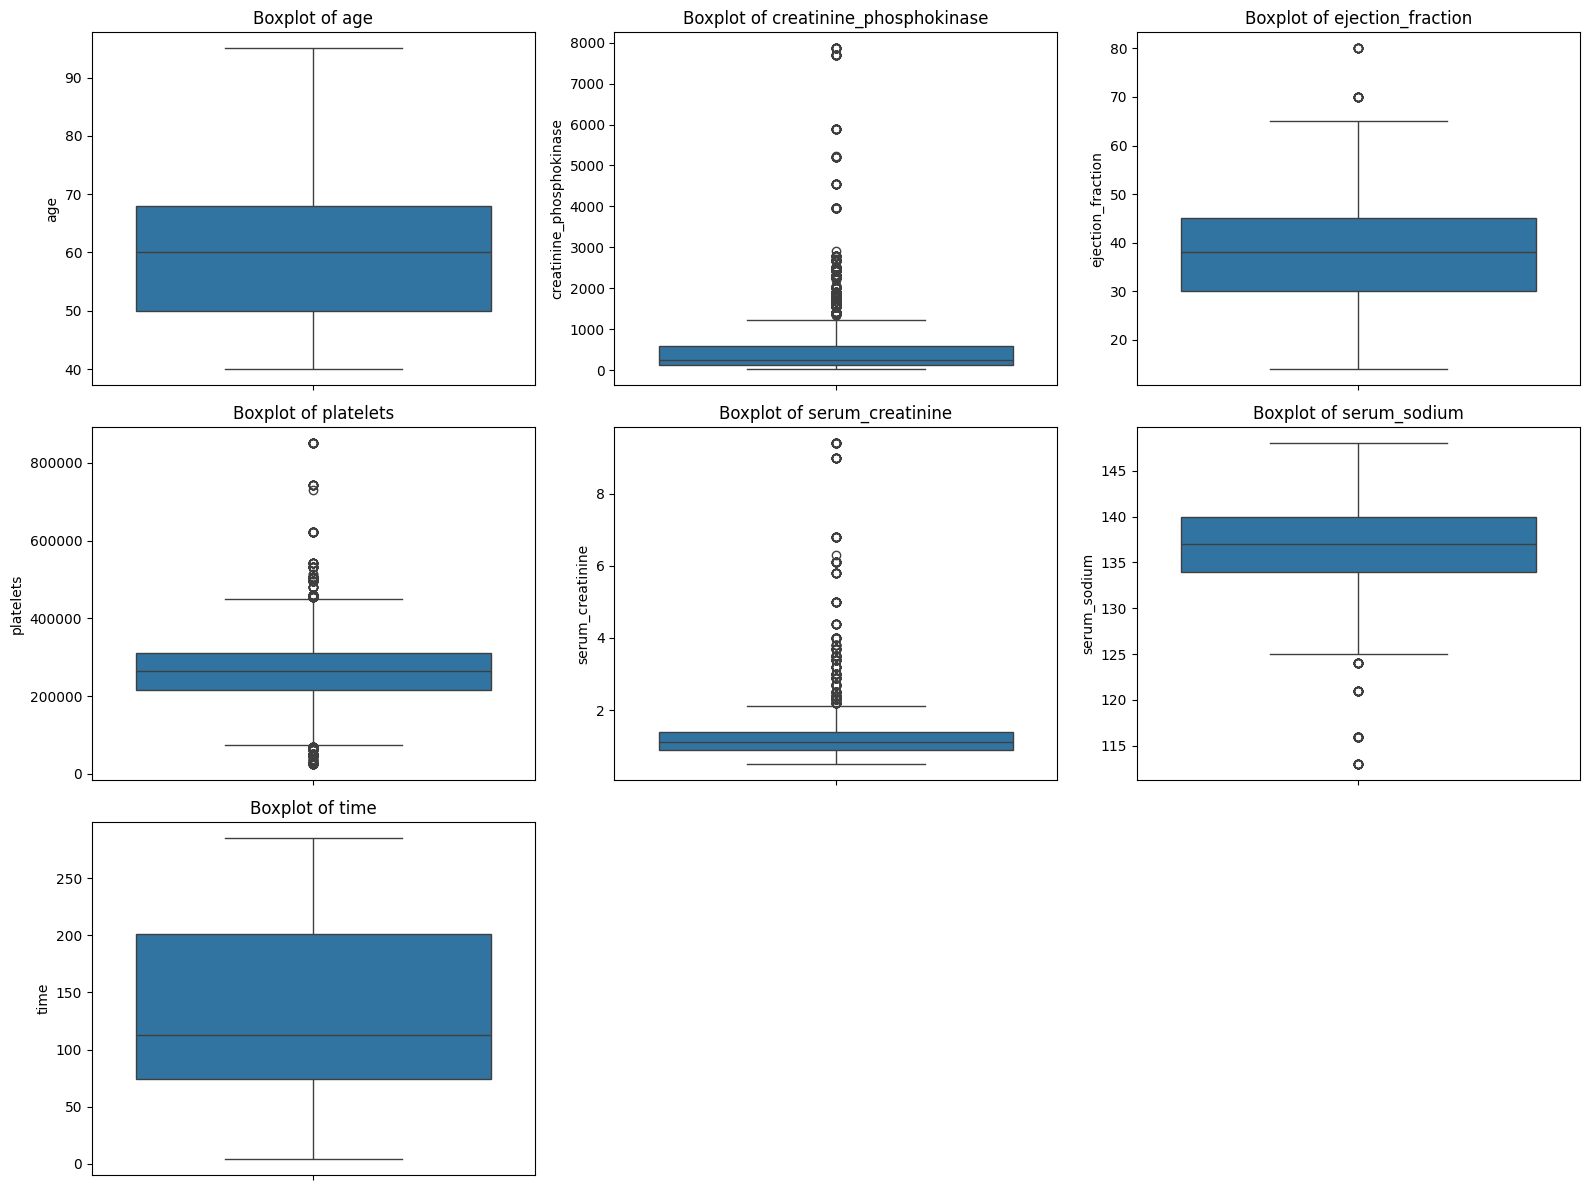

In [12]:
# Box plot in numerical features to see outliers

numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, axs = plt.subplots(3,3,figsize=(16,12))

# converts multidimension array into single dimension
axs = np.ravel(axs)

for index, value in enumerate(numerical_features):
  sns.boxplot(data=df,y=value,ax=axs[index])
  axs[index].set_title(f'Boxplot of {value}')

axs[7].set_visible(False)  # Hide subplot 8
axs[8].set_visible(False)  # Hide subplot 9
plt.tight_layout()
plt.show()

**Insight**
* 'creatinine_phosphokinase',  'platelets', 'serum_creatinine', 'serum_sodium', has more number of outliers. We need to see some kind of transformation to handle outliers.

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [14]:
# Seperate independent and dependent variable

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(5000, 12)
(5000,)


In [15]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 12)
(1250, 12)
(3750,)
(1250,)


In [16]:
# scaling dataset with standardscaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
print(X_train[0:2])
print(X_test[0:2])

[[ 0.7321601  -0.94194864 -0.026465   -0.87923242 -1.55294404 -0.76482253
   0.00716379 -0.17555908 -0.62158487  0.74047767  1.50739886 -0.75003066]
 [ 0.21992635  1.06162901  1.12357125 -0.87923242  0.63863073 -0.76482253
  -1.94330326 -0.66171791  0.04752142  0.74047767 -0.66339443  0.70500108]]
[[ 0.39067093  1.06162901 -0.2661772  -0.87923242 -0.23799918  1.30749286
  -0.30612366 -0.56448615 -0.17551401 -1.35047961 -0.66339443 -0.14484047]
 [ 0.98827697  1.06162901 -0.48453852 -0.87923242 -1.11462909 -0.76482253
   0.08801217 -0.37002262  0.7166277   0.74047767  1.50739886 -0.85304176]]


In [18]:
# Importing necessary liberies for model training and evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [19]:
model_dict = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

model_names = []
cross_score_list = []
for model_name, model in model_dict.items():
  model_names.append(model_name)
  kf = KFold(n_splits=7,shuffle=True,random_state=42)
  cvs = cross_val_score(model,X_train,y_train,cv=kf,n_jobs=-1,scoring='accuracy')
  cross_score_list.append(cvs)
print(cross_score_list)

[array([0.85261194, 0.84328358, 0.86007463, 0.83022388, 0.82649254,
       0.85794393, 0.83738318]), array([0.99440299, 0.98880597, 0.99253731, 0.99253731, 0.99813433,
       0.98878505, 0.98878505]), array([0.97761194, 0.96455224, 0.97947761, 0.97574627, 0.97947761,
       0.96635514, 0.96261682]), array([0.97014925, 0.94962687, 0.94962687, 0.9608209 , 0.95708955,
       0.94953271, 0.94953271]), array([0.98880597, 0.98507463, 0.99067164, 0.99067164, 0.99626866,
       0.97943925, 0.98317757])]


In [26]:
cross_score_mean = [np.mean(value) for value in cross_score_list]
training_accuracy = dict(zip(model_names,cross_score_mean))

print('Training accuracy score of each model\n')
for name, value in training_accuracy.items():
  print(f'{name} - {value}')


Training accuracy score of each model

Logistic Regression - 0.8440019528525597
Random Forest - 0.9919982862722436
KNN - 0.9722625191798018
SVC - 0.9551969790566526
Decision Tree - 0.9877299085347628


**Insight**
* Random Forest is the best performing model with 0.99 accuracy.
* Logistic Regression has least accuracy

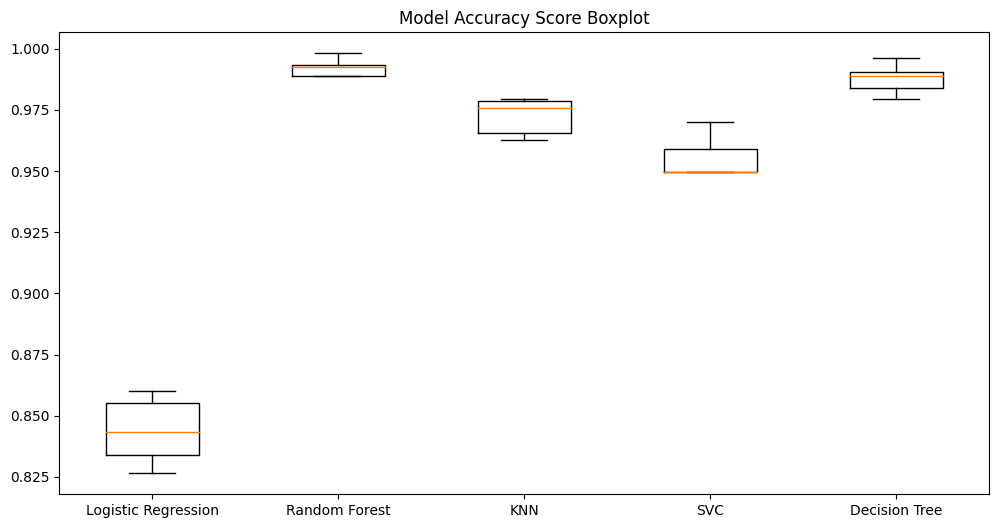

In [20]:
# Using Boxplot to observe training result

plt.figure(figsize=(12,6))
plt.boxplot(cross_score_list, labels=model_names)
plt.title('Model Accuracy Score Boxplot')
plt.show()

**Insight**


*   Random Forest and Decision Tree provided highest training accuracy near to 1
*   Logistic Regression preformed slightly poor due to the presence of outliers.



In [37]:
# test accuracy

rf = RandomForestClassifier(random_state=42,n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Test Accuracy Score without hyperparameter: ',accuracy_score(y_test,y_pred))

Test Accuracy Score without hyperparameter:  0.9912


In [33]:
# Hyperparameter tuining of RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rf_params = {
    'n_estimators':[50,100,200],
    'max_depth':[2,3,4,5,None],
    'min_samples_split':[4,8,10,20],
    'max_features':[0.6,0.8,1],
    'oob_score':[True],
    'max_samples':[0.5,0.6,0.7]
}


rsc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42,n_jobs=-1),param_distributions=rf_params,cv=4,scoring='accuracy',verbose=-1)
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [2, 3, 4, 5, None],
                                        'max_features': [0.6, 0.8, 1],
                                        'max_samples': [0.5, 0.6, 0.7],
                                        'min_samples_split': [4, 8, 10, 20],
                                        'n_estimators': [50, 100, 200],
                                        'oob_score': [True]},
                   scoring='accuracy', verbose=-1)

In [34]:
# prediction of y_train with X_train

X_train_pred = rsc.predict(X_train)

In [35]:
# best training accuracy score with hyperparameter tuining

print('Training Accuracy: ',rsc.best_score_)
print(f'Best Parameters: {rsc.best_params_}')

Training Accuracy:  0.9914666642394067
Best Parameters: {'oob_score': True, 'n_estimators': 100, 'min_samples_split': 4, 'max_samples': 0.5, 'max_features': 0.8, 'max_depth': None}


In [38]:
# Classification report for training data with hyperparameter tuining

print(f'Classification Report\n\n',classification_report(X_train_pred,y_train))

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2564
           1       0.99      1.00      0.99      1186

    accuracy                           1.00      3750
   macro avg       0.99      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



Text(0.5, 1.0, 'Confusion Matrix Training Dataset')

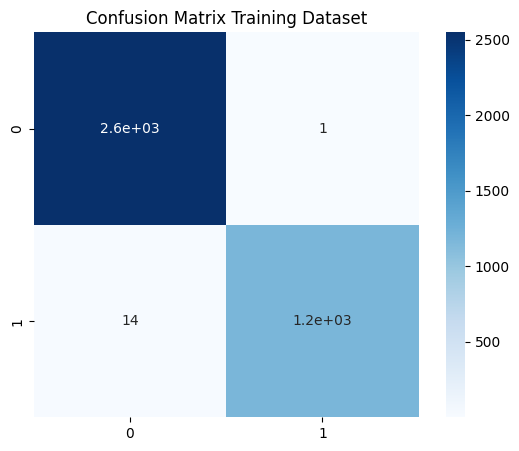

In [41]:
# Confustion matrix for training data with hyperparameter tuining

cfm = confusion_matrix(y_train,X_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cfm,cmap='Blues',annot=True,square=True)
plt.title('Confusion Matrix Training Dataset')

In [42]:
# test accuracy prediction after hyperparameter tuining

y_pred = rsc.predict(X_test)
print(f'Classification Report of Test Data wtih Hyperparameter tuining\n\n',classification_report(y_test,y_pred))

Classification Report of Test Data wtih Hyperparameter tuining

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       881
           1       0.99      0.98      0.98       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



Text(0.5, 1.0, 'Confusion Matrix Test Dataset with Hyperparameter Tuining')

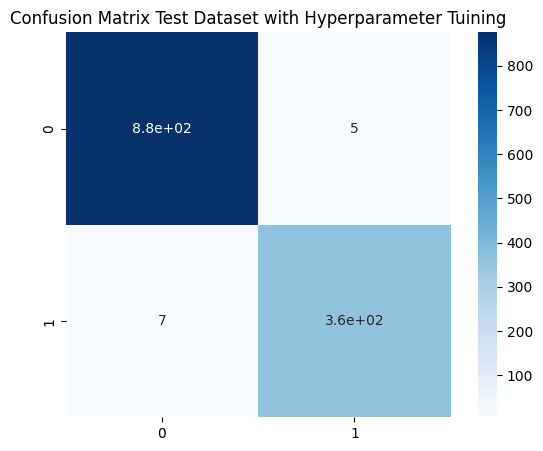

In [43]:
# Confustion matrix for test data after hyperparameter tuining

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cfm,cmap='Blues',annot=True,square=True)
plt.title('Confusion Matrix Test Dataset with Hyperparameter Tuining')

**Insight**
* We were able to obtain generalized result in test dataset. Our False Positve and False Negative ratio is balanced as seen in confusion matrix. Random forest is also known for it's property to provide generalized result in test dataset as well.

In [45]:
# Roc - Auc curve for Test Data after hyperparameter tuining

from sklearn.metrics import roc_curve, auc

y_prob = rsc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


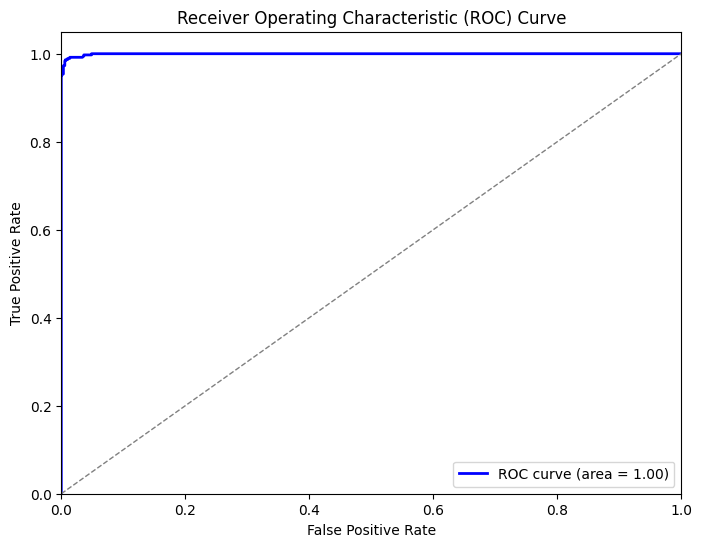

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Insight**
* Larger the area of roc curve, better our performance